In [287]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import LabelEncoder

In [288]:
train = pd.read_csv("train.csv")

In [289]:
test = pd.read_csv("test.csv")

In [290]:
print(test.shape)
print(train.shape)

(4209, 377)
(4209, 378)


In [291]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [292]:
train_target= train['y']

train_target

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [293]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


## Dimensional check

In [294]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [295]:
test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

In [296]:
train.var().sort_values().head(15)

X289    0.000000
X330    0.000000
X268    0.000000
X347    0.000000
X107    0.000000
X235    0.000000
X233    0.000000
X290    0.000000
X11     0.000000
X297    0.000000
X293    0.000000
X93     0.000000
X257    0.000238
X207    0.000238
X280    0.000238
dtype: float64

In [297]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [298]:
test.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## we want to remove all features that are either one or zero in 100% of the samples.

In [299]:
variance = VarianceThreshold(threshold=0)
train_data_withzero_var = variance.fit_transform(train.iloc[:,10:])

In [300]:
train_data_withzero_var

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## LABEL DATA TO TAKEN

In [301]:
label_data = train.iloc[:,2:10]
label_data

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [302]:
label_data.nunique()

X0    47
X1    27
X2    44
X3     7
X4     4
X5    29
X6    12
X8    25
dtype: int64

In [303]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [304]:
label

LabelEncoder()

In [305]:

label_data1 = label_data.apply(label.fit_transform)

In [306]:
label_data1

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [307]:
label_data1.var()

X0    188.741938
X1     72.777974
X2    118.808135
X3      3.027295
X4      0.005461
X5     68.076236
X6      8.508730
X8     49.531868
dtype: float64

## prepare train_data_withzero_var data into the data frame for module

In [308]:
train_data_withzero_var_final = pd.DataFrame(train_data_withzero_var)

In [309]:
train_data_withzero_var_final

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## combine both data frames train_data_withzero_var_final and label_data

In [310]:
df = pd.concat([label_data1,train_data_withzero_var_final], axis = 1)

In [311]:
df

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,346,347,348,349,350,351,352,353,354,355
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


## same process for test data

In [312]:
test_data_withzero_var = variance.fit_transform(test.iloc[:,9:])

In [313]:
test_data_withzero_var

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [314]:
label_testdata = test.iloc[:,1:9]

In [315]:
label_testdata

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
...,...,...,...,...,...,...,...,...
4204,aj,h,as,f,d,aa,j,e
4205,t,aa,ai,d,d,aa,j,y
4206,y,v,as,f,d,aa,d,w
4207,ak,v,as,a,d,aa,c,q


In [316]:
label_testdata1 = label_testdata.apply(label.fit_transform)

In [317]:
label_testdata1

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4
4205,42,1,8,3,3,1,9,24
4206,47,23,17,5,3,1,3,22
4207,7,23,17,0,3,1,2,16


In [318]:
data_test = pd.DataFrame(test_data_withzero_var)

In [319]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [320]:
data_test_final = pd.concat([label_testdata1,data_test], axis=1)

In [342]:
data_test_final

,X0,X1,X2,X3,X4,X5,X6,X8,0,1,...,353,354,355,356,357,358,359,360,361,362
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,6,9,17,5,3,1,9,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,42,1,8,3,3,1,9,24,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,47,23,17,5,3,1,3,22,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,7,23,17,0,3,1,2,16,0,0,...,0,0,1,0,0,0,0,0,0,0


In [322]:
from sklearn.model_selection import train_test_split

In [323]:
x_train,x_test,y_train,y_test = train_test_split(train_data_withzero_var_final, train_target, random_state=1, test_size =0.3)

In [324]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)

In [325]:
from sklearn import svm

from xgboost import XGBRegressor

xgbr = XGBRegressor()

In [326]:
model = xgbr.fit(x_train,y_train)

In [327]:
from sklearn.metrics import r2_score, mean_squared_error

In [330]:
ypred_test = model.predict(x_test)

In [331]:
ypred_test

array([ 82.162445, 111.93146 , 109.81678 , ..., 115.40629 ,  82.01748 ,
        93.05307 ], dtype=float32)

In [333]:
 ypred_train = model.predict(x_train)

In [335]:
ypred_train

array([102.38113,  87.99163, 103.30913, ..., 113.25503, 136.83685,
       108.24547], dtype=float32)

In [338]:
print(r2_score(ypred_train, y_train))
print(mean_squared_error(ypred_train, y_train))

0.7138430649266132
33.09094789100534


In [344]:
graph = pd.DataFrame({'ytest': y_test, 'ypred': ypred_test})

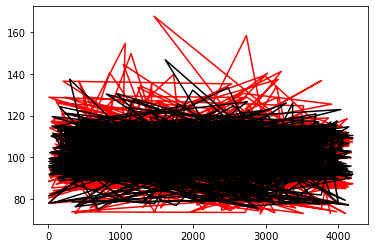

In [346]:
plt.plot(graph['ytest'],color = 'red')
plt.plot(graph['ypred'],color = 'black')